# Energy calibration examples

In [1]:
import matplotlib.pyplot as plt
import becquerel as bq

Let's load an HPGe spectrum from a file and apply a calibration. This file will generate a warning because its calibration is invalid.

In [2]:
spec = bq.Spectrum.from_file('../tests/samples/digibase_5min_30_1.spe')

SpeFile: Reading file ../tests/samples/digibase_5min_30_1.spe
Line 1039 unknown:  $PRESETS:
Line 1040 unknown:  None
Line 1041 unknown:  0
Line 1042 unknown:  0


becquerel/parsers/spectrum_file.py:110: UserWarning: Ignoring calibration; energies not monotonically increasing
  'Ignoring calibration; energies not monotonically increasing')


Did an energy calibration get loaded from the file?

In [3]:
spec.is_calibrated

False

Let's take a look at the spectrum. We happen to know that this spectrum contains background, Cesium-137, and Cobalt-60.

(0, 450)

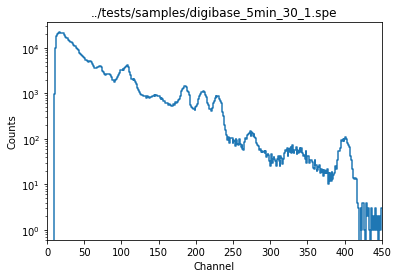

In [4]:
spec.plot(yscale='log')
plt.xlim(0, 450)

## `LinearEnergyCal` example

One can instantiate a `LinearEnergyCal` or any other calibration in two ways:
1. `from_coeffs(dict)` class method where the dictionary is a dictionary of calibration coefficients (e.g., `{'slope': 1.0, 'offset': 0.0}`)
2. `from_points(chlist, kevlist)` class method with channels and energies of calibration points. A fit is automatically performed to generate the best coefficients.

Let's create a calibration from points. The 1460 keV line is around channel 230 and the 2614 keV line is around channel 400:

In [5]:
cal = bq.LinearEnergyCal.from_points([230, 400], [1460, 2614])

The coefficents are automatically fit to those points:

In [6]:
cal._coeffs

{'b': 6.788235294117641, 'c': -101.2941176470558}

Sometimes one may want to include the point (0, 0) in the calibration to make the calibration pass closer to the origin:

In [7]:
cal = bq.LinearEnergyCal.from_points([0, 230, 400], [0, 1460, 2614])
cal._coeffs

{'b': 6.5243176178660045, 'c': -12.106699751860171}

This case is automatically handled using the `include_origin` kwarg:

In [8]:
cal = bq.LinearEnergyCal.from_points([230, 400], [1460, 2614], include_origin=True)
cal._coeffs

{'b': 6.5243176178660045, 'c': -12.106699751860171}

Here is a calibration instantiated using coefficients:

In [9]:
cal = bq.LinearEnergyCal.from_coeffs({'b': 6.524, 'c': -12.106})
cal._coeffs

{'b': 6.524, 'c': -12.106}

The calibration can be applied to our `Spectrum` to generate energies from channels:

In [10]:
spec.apply_calibration(cal)
spec.is_calibrated

True

Now we should be able to plot the spectrum and see that the source lines are at the correct energies:

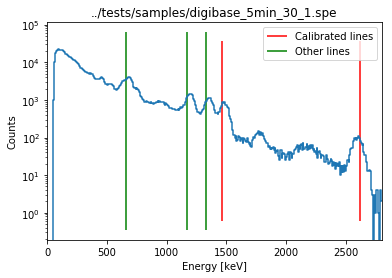

In [11]:
spec.plot(xmode='energy', yscale='log')
plt.vlines([1460, 2614], *plt.gca().get_ylim(), color='red', label='Calibrated lines')
plt.vlines([662, 1173, 1333], *plt.gca().get_ylim(), color='green', label='Other lines')
plt.xlim(0, 2800)
plt.legend()